# Change Detection: CUSUM vs CPM

> Remarks
> - CUSUM analyzes the data stream one sample at a time
> - CPM considers the entire dataset to identify the optimal split that maximizes the statistic

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from src.ChangeDetector import ChangeDetector
from src.data import generate_data

# PyCUSUM
from src.pyCUSUM import pyCUSUM

# PyCPM
from src.pyCPM import pyCPM
from src.StatisticalTest import MannWhitneyU, Mood, Lepage

from src.Plotter import Plotter
plotter = Plotter(figsize=(12, 5), dpi=500)

In [3]:
# Utility function

def run(x: np.ndarray,
        y: np.ndarray,
        detector: ChangeDetector,
        plotter: Plotter,
        fname: str = None,
        cp_gt: int = None) -> None:
    """Utility function used to run the detector and plot the results."""
    cps, stats = detector.detect_changes(y)

    if len(cps) > 0:
        cp = cps[0]
        if cp >= cp_gt:
            print(f"Change detected with delay {cp - cp_gt}")
        else:
            print(f"False alarm detected {cp_gt - cp} samples before the true change point")
    else:
        cp = None
        print("No change detected")

    title = f"Monitoring with {detector}"
    plotter.plot(x=x, y=y,
                 stats=stats, thr=detector.thr,
                 cp=cp, cp_gt=cp_gt,
                 title=title,
                 fname=fname)

### Generate data

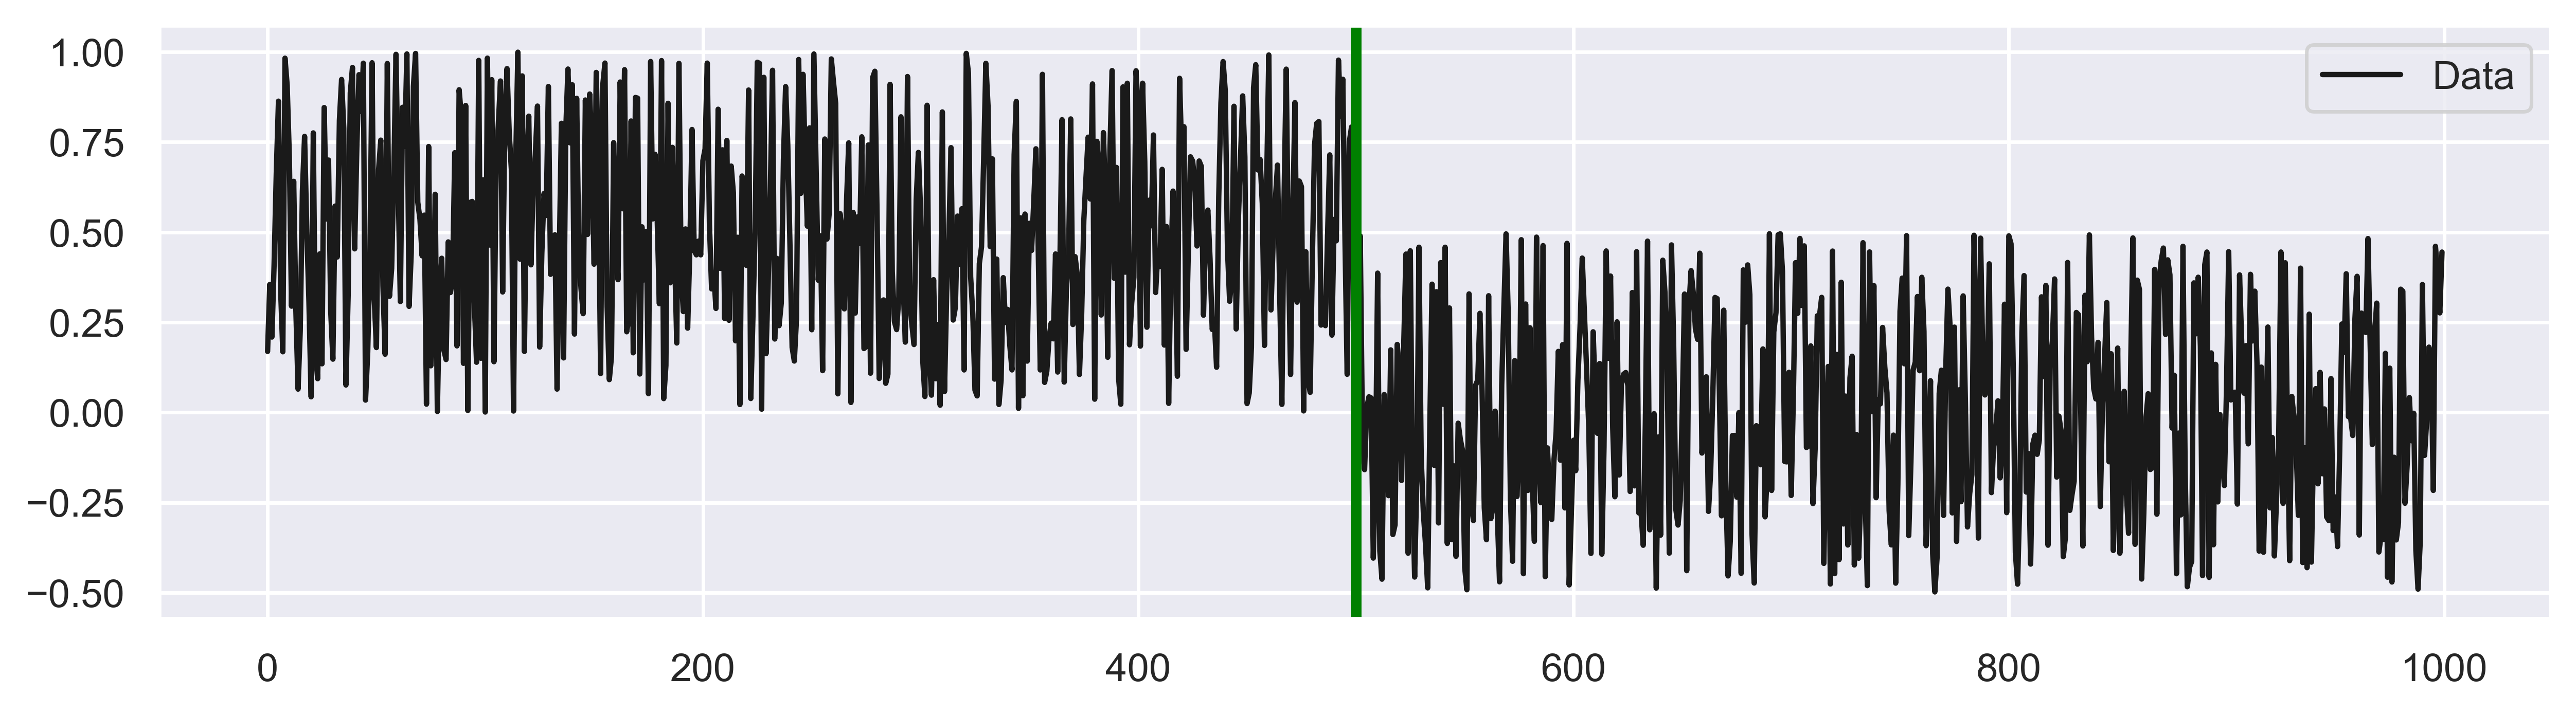

In [4]:
x, y, cp_gt = generate_data()
plotter.plot(x, y, cp_gt=cp_gt, figsize=(12, 3))

### Monitoring with CUSUM

Change detected with delay 18


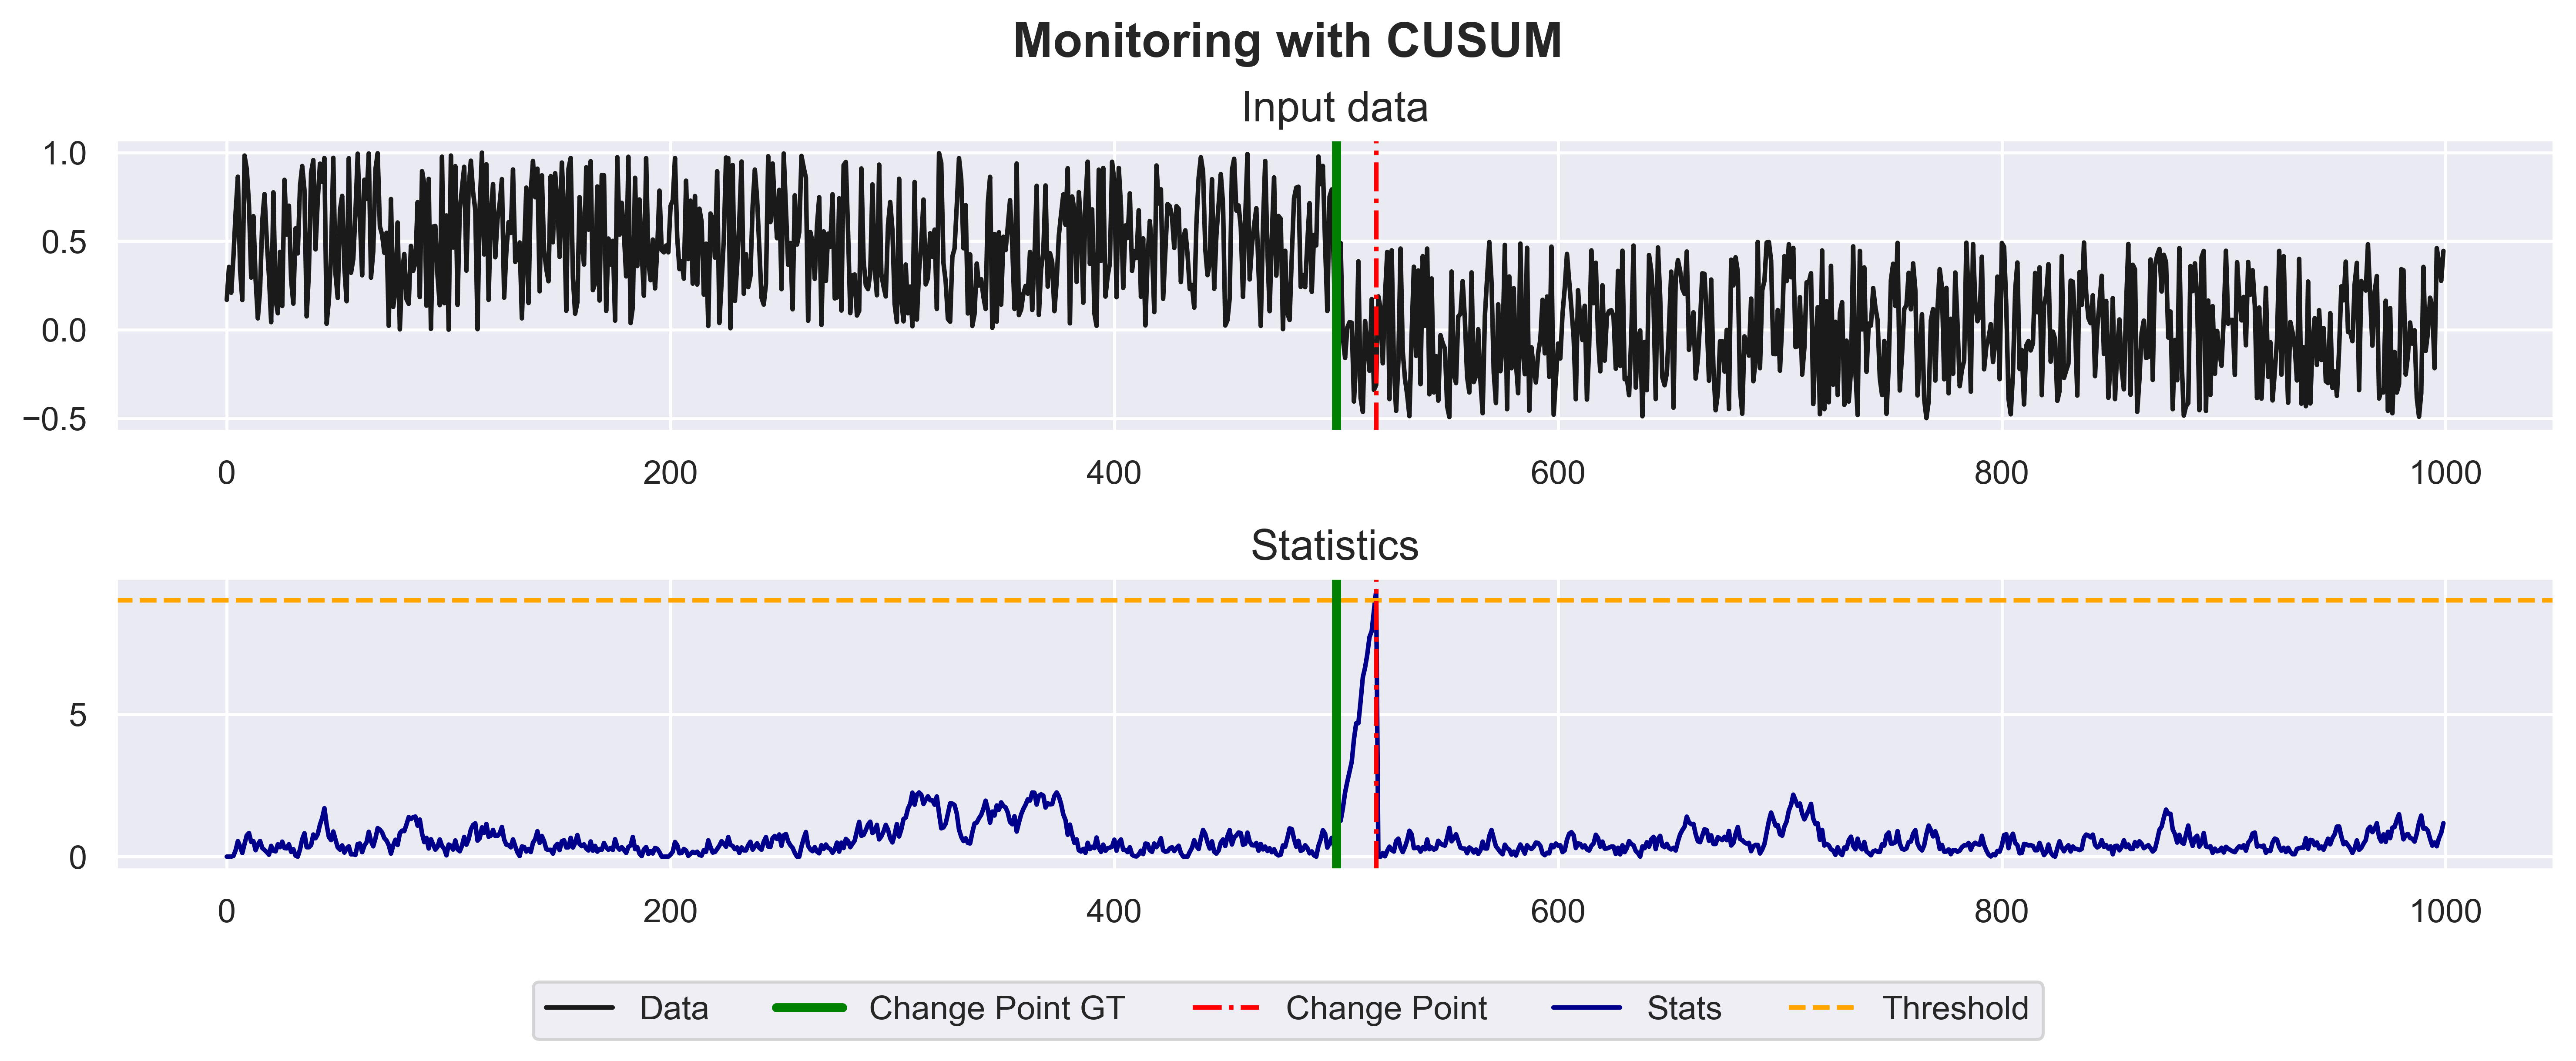

In [5]:
thr = 9.
run(x, y, detector=pyCUSUM(thr=thr), plotter=plotter, cp_gt=cp_gt)

### Monitoring with CPM

Change detected with delay 0


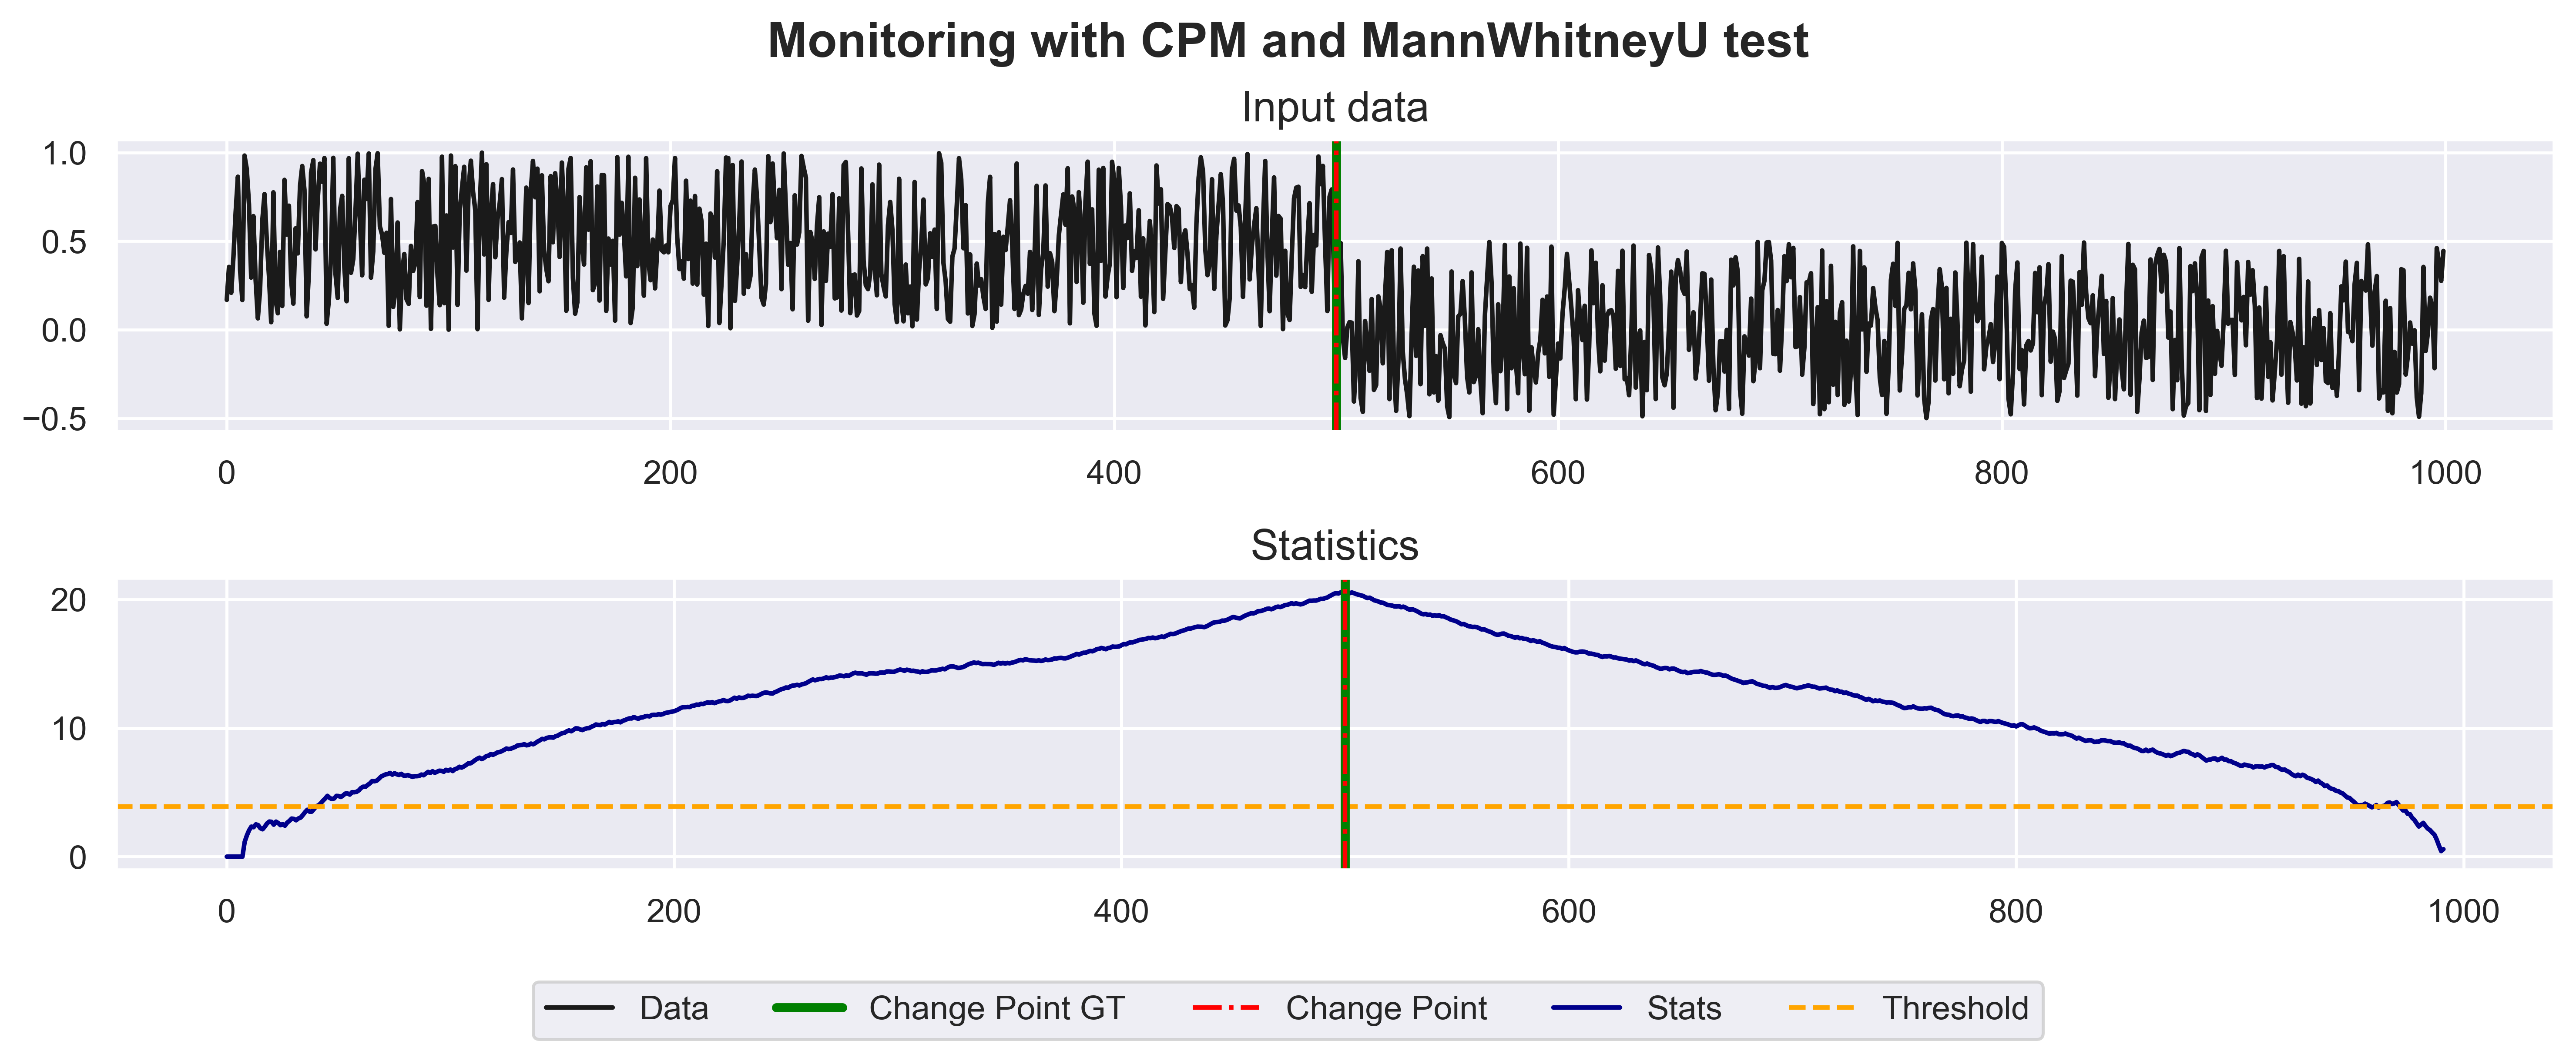

No change detected


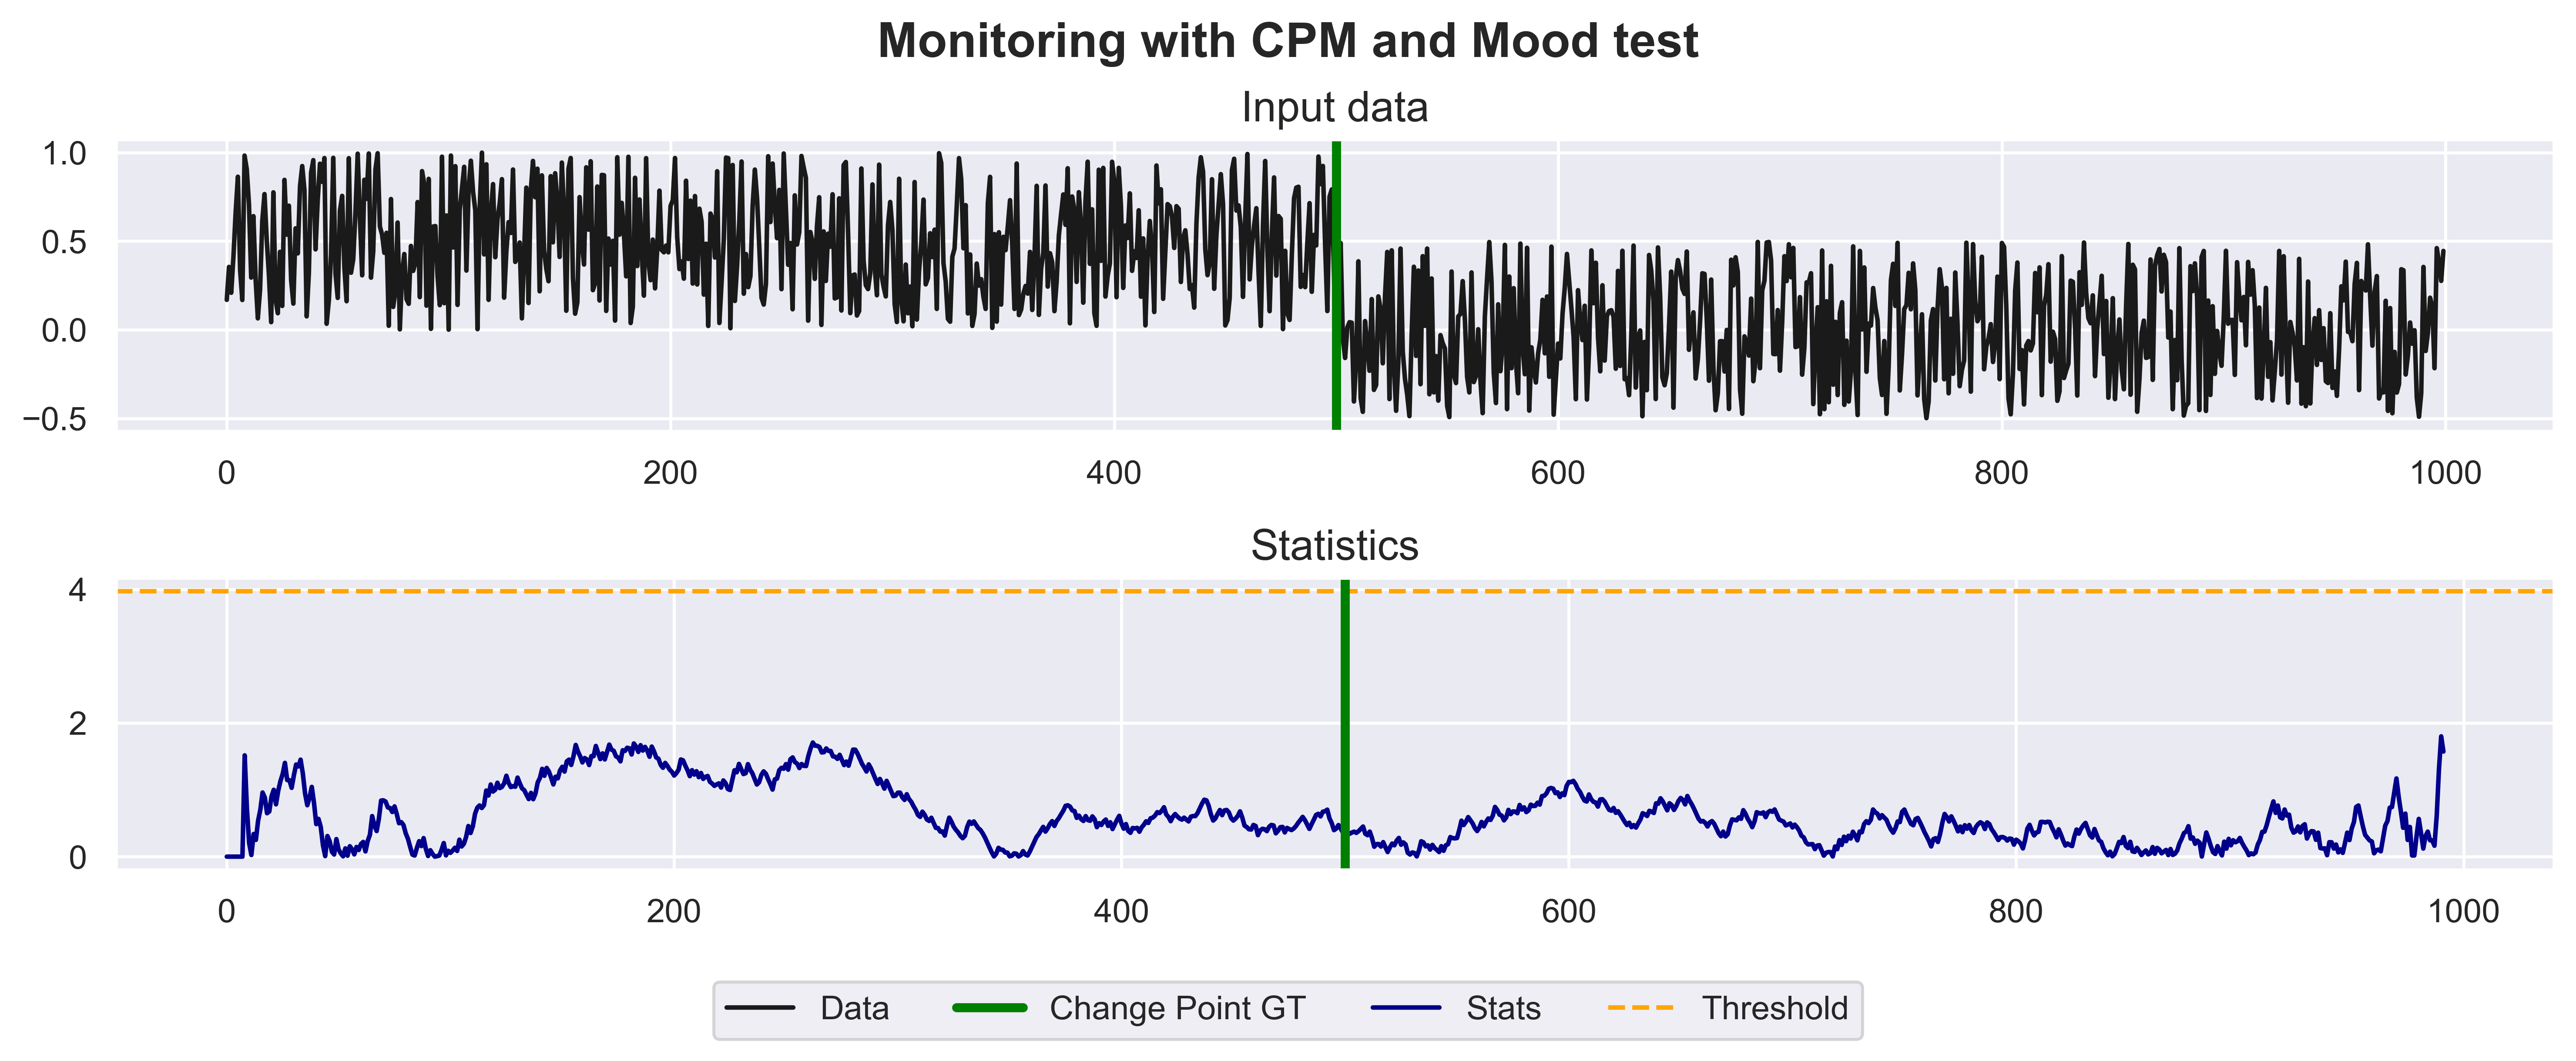

Change detected with delay 0


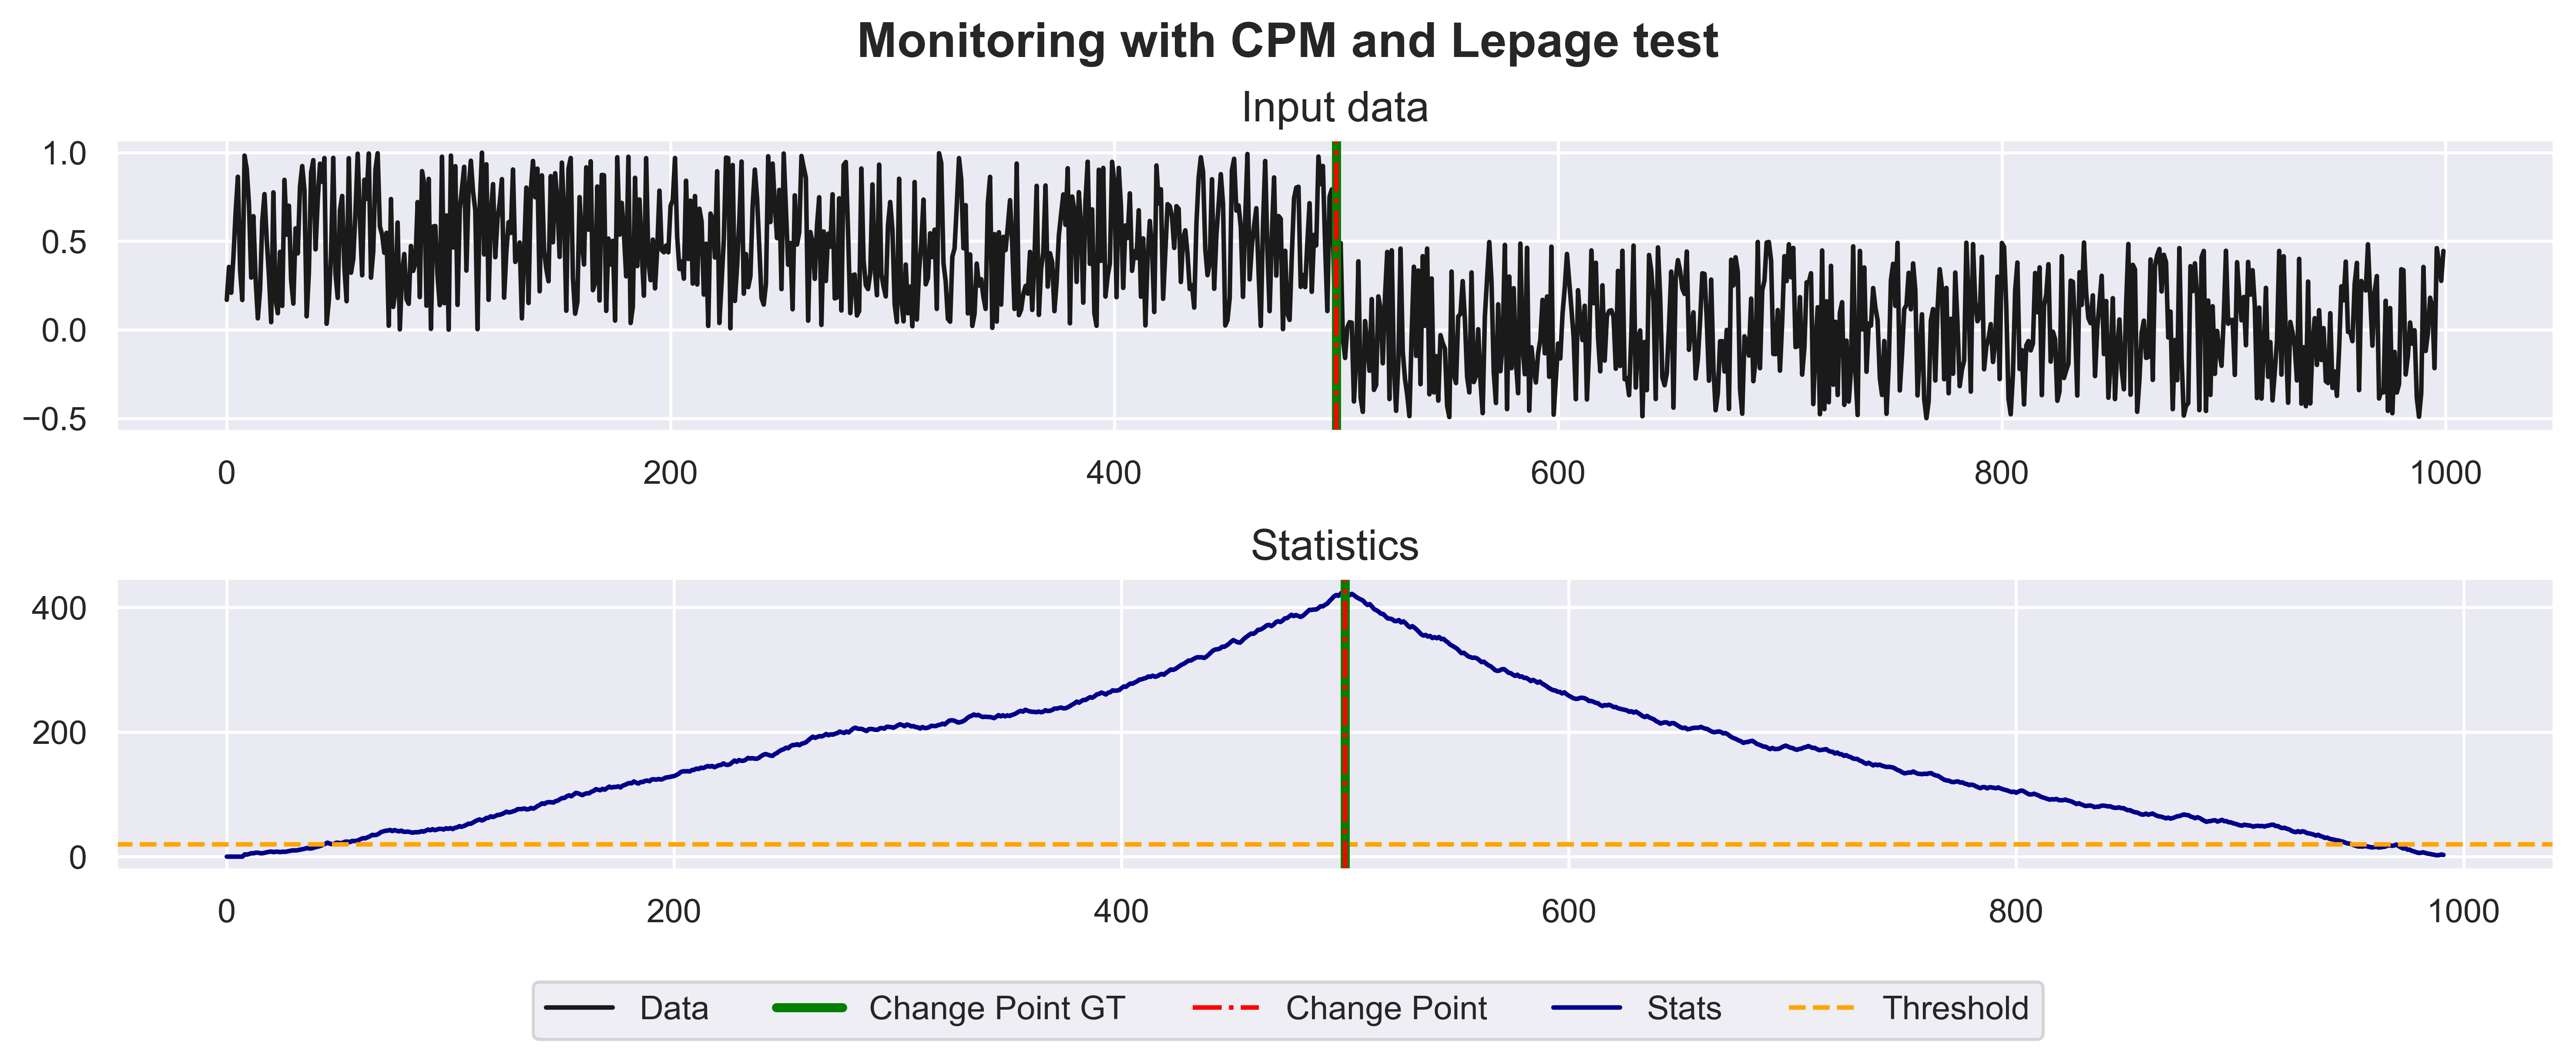

In [6]:
# Note: we use the same thresholds from the CPM library available in R, with the significance level (alpha) set to 0.005.
run(x, y, pyCPM(test=MannWhitneyU, thr=3.9090), plotter, cp_gt=cp_gt)
run(x, y, pyCPM(test=Mood, thr=3.9723), plotter, cp_gt=cp_gt)
run(x, y, pyCPM(test=Lepage, thr=19.6325), plotter, cp_gt=cp_gt)

# Note: the Mood test detects changes in scale (variance), but we are only shifting the mean of the data stream. Therefore, we expect it to detect no changes.